data from: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset/

solution from: https://nbviewer.jupyter.org/github/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/2.2-simpson-characters-recognition.ipynb

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/the-simpsons-characters-dataset/annotation.txt
/kaggle/input/the-simpsons-characters-dataset/weights.best.hdf5
/kaggle/input/the-simpsons-characters-dataset/number_pic_char.csv
/kaggle/input/the-simpsons-characters-dataset/characters_illustration.png
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_19.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/sideshow_bob_48.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/edna_krabappel_15.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_32.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson_22.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_18.jpg
/kaggle/input/the-simpsons-characters-dataset/kag

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0475.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0008.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0489.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0336.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0386.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0364.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/kent_brockman/pic_0339.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0897.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0637.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0661.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/milhouse_van_houten/pic_0475.jpg
/kaggle/input/the-simpsons-characters-da

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_1359.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_1437.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0897.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0637.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders/pic_0010.jpg
/kaggle/input/the-sim

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0008.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0191.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0228.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0053.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0227.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0058.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lenny_leonard/pic_0061.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0566.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0810.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0095.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0109.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_1271.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0136.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_1182.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0813.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0273.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_0783.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson/pic_1038.jpg
/kaggle/input/the-sim

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_1023.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0163.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0533.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0906.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0338.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0321.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0531.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0257.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic_0918.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/charles_montgomery_burns/pic

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0925.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0760.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0660.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0132.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0628.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0564.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0706.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0739.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0931.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/principal_skinner/pic_0423.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_datas

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0026.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0080.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0084.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0081.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0024.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0013.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0076.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0003.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0014.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0047.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/ralph_wiggum/pic_0060.jpg
/kaggle/input/the-sim

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0479.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0285.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_1126.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0325.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0288.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_1418.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0530.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0116.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0130.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_0997.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak/pic_1219.jpg
/kaggle/input/the-simpsons-chara

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0325.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0288.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0530.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0116.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0130.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0372.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0850.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0954.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0455.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0120.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/chief_wiggum/pic_0322.jpg
/kaggle/input/the-sim

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0637.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0661.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/sideshow_bob/pic_0475.jpg
/kaggle/input/the-simpsons-characters-dataset/

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0727.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0523.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0540.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_1005.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0597.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0416.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0113.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_houten/pic_0069.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/milhouse_van_hou

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_1393.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_0924.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_0255.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_1096.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_0836.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_0334.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_1036.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_0464.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/ned_flanders/pic_1339.jpg
/kaggle/input/the-simpsons-characters-dataset/

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0008.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0191.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0228.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0053.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lenny_leonard/pic_0227.jpg
/kaggle/input/the-simpsons-characters

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0372.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0850.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0954.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1350.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1209.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1262.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0455.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_1266.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/lisa_simpson/pic_0120.jpg
/kaggle/input/the-simpsons-characters-dataset/

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0524.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0996.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0459.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0639.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_1153.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0766.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0556.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/charles_montgomery_burns/pic_0159.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_d

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0897.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0637.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/krusty_the_clown/pic_0010.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1359.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1437.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/moe_szyslak/pic_0897.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0897.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0637.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/chief_wiggum/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0008.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0336.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0386.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0364.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/edna_krabappel/pic_0339.jpg
/kaggle/input/the-simpsons-c

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0897.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0637.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/marge_simpson/pic_0010.jpg
/kaggle/input/the-simpsons-characters

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0096.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0133.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0131.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0091.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0274.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0457.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0079.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0194.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/comic_book_guy/pic_0407.jpg
/kaggle/input/the-simpsons-c

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_1359.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_1641.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_1886.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_1611.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_2086.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0055.jpg
/kaggle/input/the-simpsons-characters

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0203.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0651.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0156.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0096.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0795.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0675.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_0133.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_2031.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/homer_simpson/pic_1631.jpg
/kaggle/input/the-simpsons-characters

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_1054.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0594.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0785.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0190.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0701.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0215.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_1085.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0816.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/bart_simpson/pic_0988.jpg
/kaggle/input/the-simpsons-characters-dataset/

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0105.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0010.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0008.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0053.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0058.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0061.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0005.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/groundskeeper_willie/pic_0067.jpg
/kaggle/input/the-simpsons-cha

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_0703.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_1255.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_1021.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_0534.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_1250.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_1004.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_0696.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_0469.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_1134.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_0793.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson/pic_0155.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0120.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0322.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0546.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0476.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0341.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0342.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0003.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0688.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0467.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/abraham_grampa_simpson/pic_0551.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_1359.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_1641.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0708.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_1886.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_1611.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0955.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_2086.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0006.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0055.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0674.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0105.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0203.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0651.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0156.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0096.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0795.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0675.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_0133.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_2031.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_1631.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_1242.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson/pic_2051.jpg
/kaggle/in

/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0818.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0999.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0553.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0917.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0153.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0932.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0687.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0617.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_1117.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0832.jpg
/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0104.jpg
/kaggle/input/the-sim

In [2]:
# 匯入相關所需的模組
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import glob
import time
from random import shuffle
from collections import Counter

from sklearn.model_selection import train_test_split

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


## 資料預處理 (Data Preprocessing)

In [3]:
# 卡通角色的Label-encoding
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

img_width = 42 
img_height = 42


num_classes = len(map_characters) # 要辨識的角色種類

pictures_per_class = 1000 # 每個角色會有接近1000張訓練圖像
test_size = 0.15

imgsPath = "/kaggle/input/the-simpsons-characters-dataset/simpsons_dataset/simpsons_dataset/"

In [4]:
# 將訓練資料圖像從檔案系統中取出並進行
def load_pictures():
    pics = []
    labels = []
    
    for k, v in map_characters.items(): # k: 數字編碼 v: 角色label
        # 把某一個角色在檔案夾裡的所有圖像檔的路徑捉出來
        pictures = [k for k in glob.glob(imgsPath + "/" + v + "/*")]        
        print(v + " : " + str(len(pictures))) # 看一下每個角色有多少訓練圖像
        for i, pic in enumerate(pictures):
            tmp_img = cv2.imread(pic)
            
            # 由於OpenCv讀圖像時是以BGR (Blue-Green-Red), 我們把它轉置成RGB (Red-Green-Blue)
            tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
            tmp_img = cv2.resize(tmp_img, (img_height, img_width)) # 進行大小歸一位            
            pics.append(tmp_img)
            labels.append(k)    
    return np.array(pics), np.array(labels)

# 取得訓練資料集與驗證資料集
def get_dataset(save=False, load=False):
    if load: 
        # 從檔案系統中載入之前處理保存的訓練資料集與驗證資料集
        h5f = h5py.File('dataset.h5','r')
        X_train = h5f['X_train'][:]
        X_test = h5f['X_test'][:]
        h5f.close()
        
        # 從檔案系統中載入之前處理保存的訓練資料標籤與驗證資料集籤
        h5f = h5py.File('labels.h5', 'r')
        y_train = h5f['y_train'][:]
        y_test = h5f['y_test'][:]
        h5f.close()
    else:
        # 從最原始的圖像檔案開始處理
        X, y = load_pictures()
        y = keras.utils.to_categorical(y, num_classes) # 目標的類別種類數
        
        # 將資料切分為訓練資料集與驗證資料集 (85% vs. 15%)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        if save: # 保存尚未進行歸一化的圖像數據
            h5f = h5py.File('dataset.h5', 'w')
            h5f.create_dataset('X_train', data=X_train)
            h5f.create_dataset('X_test', data=X_test)
            h5f.close()
            
            h5f = h5py.File('labels.h5', 'w')
            h5f.create_dataset('y_train', data=y_train)
            h5f.create_dataset('y_test', data=y_test)
            h5f.close()
    
    # 進行圖像每個像素值的型別轉換與歸一化處理
    X_train = X_train.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    print("Train", X_train.shape, y_train.shape)
    print("Test", X_test.shape, y_test.shape)
    
    return X_train, X_test, y_train, y_test 

In [5]:
# 取得訓練資料集與驗證資料集  
X_train, X_test, y_train, y_test = get_dataset(save=True, load=False)

abraham_grampa_simpson : 913
apu_nahasapeemapetilon : 623
bart_simpson : 1342
charles_montgomery_burns : 1193
chief_wiggum : 986
comic_book_guy : 469
edna_krabappel : 457
homer_simpson : 2246
kent_brockman : 498
krusty_the_clown : 1206
lisa_simpson : 1354
marge_simpson : 1291
milhouse_van_houten : 1079
moe_szyslak : 1452
ned_flanders : 1454
nelson_muntz : 358
principal_skinner : 1194
sideshow_bob : 877
Train (16143, 42, 42, 3) (16143, 18)
Test (2849, 42, 42, 3) (2849, 18)


## 網絡模型 (Model)

In [6]:
def create_model_six_conv(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    return model;

#圖像的shape是 (42,42,3)
model = create_model_six_conv((img_height, img_width, 3)) # 初始化一個模型
model.summary() # 秀出模型架構

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 42, 42, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)         

In [7]:
# 讓我們先配置一個常用的組合來作為後續優化的基準點
lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

## 訓練 (Training)

In [8]:
def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))

batch_size = 32
epochs = 30

history = model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         validation_data=(X_test, y_test),
         shuffle=True,
         callbacks=[LearningRateScheduler(lr_schedule),
             ModelCheckpoint('model.h5', save_best_only=True)
         ])

Train on 16143 samples, validate on 2849 samples
Epoch 1/30
16143/16143 [==============================] - 8s 485us/step - loss: 2.5469 - accuracy: 0.1983 - val_loss: 2.2050 - val_accuracy: 0.3612
Epoch 2/30
16143/16143 [==============================] - 4s 238us/step - loss: 1.8924 - accuracy: 0.4134 - val_loss: 1.4845 - val_accuracy: 0.5521
Epoch 3/30
16143/16143 [==============================] - 4s 236us/step - loss: 1.4024 - accuracy: 0.5710 - val_loss: 1.1339 - val_accuracy: 0.6504
Epoch 4/30
16143/16143 [==============================] - 4s 236us/step - loss: 1.0798 - accuracy: 0.6670 - val_loss: 0.9369 - val_accuracy: 0.7024
Epoch 5/30
16143/16143 [==============================] - 4s 236us/step - loss: 0.8843 - accuracy: 0.7328 - val_loss: 0.7052 - val_accuracy: 0.7852
Epoch 6/30
16143/16143 [==============================] - 4s 236us/step - loss: 0.7395 - accuracy: 0.7762 - val_loss: 0.6404 - val_accuracy: 0.8115
Epoch 7/30
16143/16143 [==============================] - 4s 23

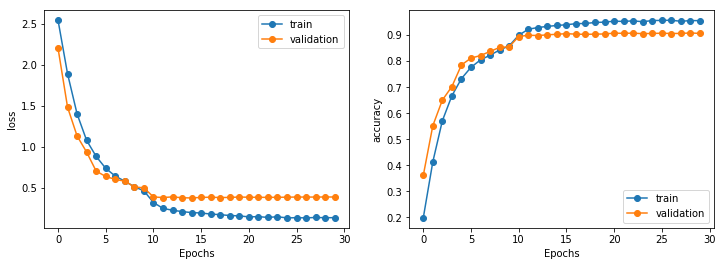

In [10]:
# 透過趨勢圖來觀察訓練與驗證的走向 (特別去觀察是否有"過擬合(overfitting)"的現象)
import matplotlib.pyplot as plt

def plot_train_history(history, train_metrics, val_metrics):
    plt.plot(history.history.get(train_metrics),'-o')
    plt.plot(history.history.get(val_metrics),'-o')
    plt.ylabel(train_metrics)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    
    
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plot_train_history(history, 'loss','val_loss')

plt.subplot(1,2,2)
plot_train_history(history, 'accuracy','val_accuracy')

plt.show()

## 驗證評估 (Evaluation)
### 加載測試數據

In [14]:
import os
from pathlib import PurePath # 處理不同作業系統file path的解析問題 (*nix vs windows)

# 載入要驗證模型的數據
def load_test_set(path):
    pics, labels = [], []
    reverse_dict = {v:k for k,v in map_characters.items()}
    for pic in glob.glob(path+'*.*'):
        char_name = "_".join(os.path.basename(pic).split('_')[:-1])
        if char_name in reverse_dict:
            temp = cv2.imread(pic)
            temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
            temp = cv2.resize(temp, (img_height,img_width)).astype('float32') / 255.
            pics.append(temp)
            labels.append(reverse_dict[char_name])
    X_test = np.array(pics)
    y_test = np.array(labels)
    y_test = keras.utils.to_categorical(y_test, num_classes) # 進行one-hot編碼
    print("Test set", X_test.shape, y_test.shape)
    return X_test, y_test

imgsPath = "/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/"

#載入數據
X_valtest, y_valtest = load_test_set(imgsPath)

Test set (890, 42, 42, 3) (890, 18)


## 計算預測的正確率

In [15]:
# 預測與比對
from keras.models import load_model

# 把訓練時val_loss最小的模型載入
model = load_model('model.h5')

# 預測與比對
y_pred = model.predict_classes(X_valtest)
acc = np.sum(y_pred==np.argmax(y_valtest, axis=1))/np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.9595505617977528


# 使用圖像增強 (Data Augmentation)

In [18]:
from keras.preprocessing.image import ImageDataGenerator

datagen = datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# 保存在訓練過程中比較好的模型
filepath="model-dtaug.h5"

# 保留"val_acc"最好的那個模型
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

# 定義學習率遞減的原則
def lr_schedule(epoch):
    return lr*(0.1**int(epoch/10))

#圖像的shape是 (42,42,3)
model = create_model_six_conv((img_height, img_width, 3)) # 初始化一個模型

lr = 0.01
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

callbacks_list = [LearningRateScheduler(lr_schedule) ,checkpoint]
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=X_train.shape[0] // batch_size,
                            epochs=epochs,
                            validation_data=(X_test, y_test),
                            callbacks=callbacks_list)

Epoch 1/30
504/504 [==============================] - 13s 26ms/step - loss: 2.6726 - accuracy: 0.1626 - val_loss: 2.3734 - val_accuracy: 0.2657
Epoch 2/30
504/504 [==============================] - 12s 25ms/step - loss: 2.1921 - accuracy: 0.3243 - val_loss: 1.7363 - val_accuracy: 0.4577
Epoch 3/30
504/504 [==============================] - 12s 24ms/step - loss: 1.6352 - accuracy: 0.4977 - val_loss: 1.1531 - val_accuracy: 0.6518
Epoch 4/30
504/504 [==============================] - 12s 24ms/step - loss: 1.2648 - accuracy: 0.6070 - val_loss: 1.0778 - val_accuracy: 0.6771
Epoch 5/30
504/504 [==============================] - 12s 24ms/step - loss: 1.0343 - accuracy: 0.6848 - val_loss: 0.8048 - val_accuracy: 0.7680
Epoch 6/30
504/504 [==============================] - 12s 24ms/step - loss: 0.9158 - accuracy: 0.7267 - val_loss: 0.6895 - val_accuracy: 0.8003
Epoch 7/30
504/504 [==============================] - 12s 24ms/step - loss: 0.7971 - accuracy: 0.7609 - val_loss: 0.5782 - val_accuracy:

## 計算預測的正確率

In [19]:
# 預測與比對
from keras.models import load_model

# 把訓練時val_loss最小的模型載入
model = load_model('model-dtaug.h5')

# 預測與比對
y_pred = model.predict_classes(X_valtest)
acc = np.sum(y_pred==np.argmax(y_valtest, axis=1))/np.size(y_pred)
print("Test accuracy = {}".format(acc))

Test accuracy = 0.9280898876404494


## 預測結果視覺化

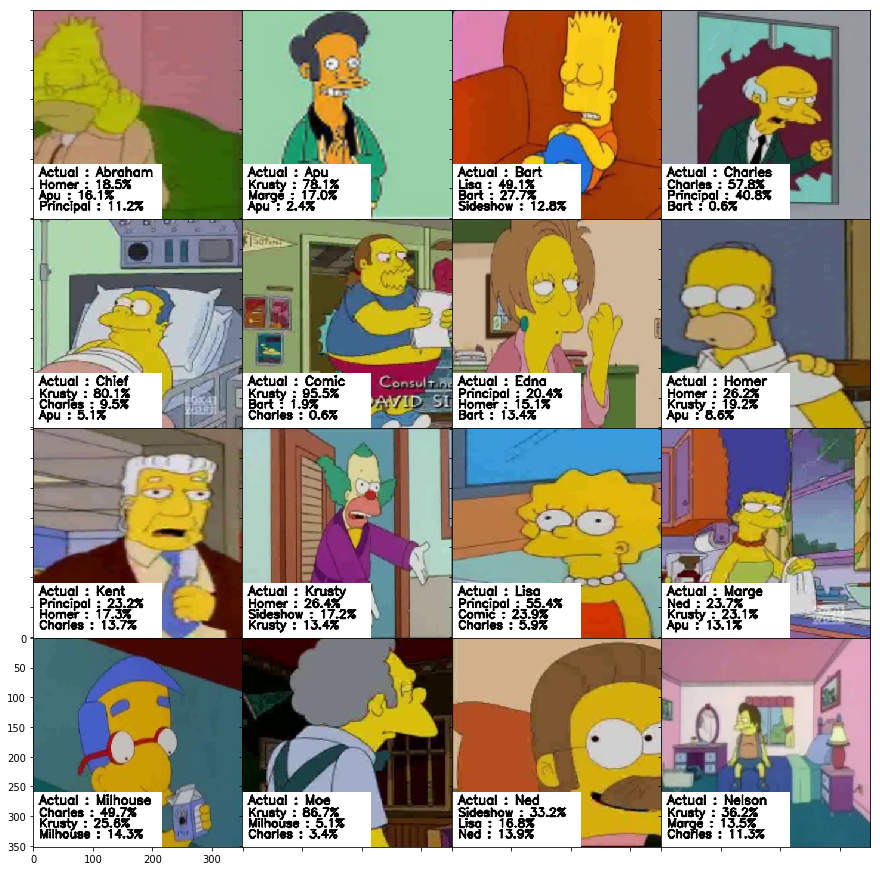

In [21]:
# 預測與比對
from keras.models import load_model
from mpl_toolkits.axes_grid1 import AxesGrid

# 把訓練時val_loss最小的模型載入
model = load_model('model.h5')

F = plt.figure(1, (15,20))
grid = AxesGrid(F, 111, nrows_ncols=(4, 4), axes_pad=0, label_mode="1")

for i in range(16):
    char = map_characters[i]
    image = cv2.imread(np.random.choice([k for k in glob.glob('/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/*.*') if char in k]))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(image, (42, 42)).astype('float32') / 255.
    a = model.predict(pic.reshape(1, 42, 42,3))[0]
    actual = char.split('_')[0].title()
    text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
       key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    img = cv2.resize(img, (352, 352))
    cv2.rectangle(img, (0,260),(215,352),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Actual : %s' % actual, (10, 280), font, 0.7,(0,0,0),2,cv2.LINE_AA)
    for k, t in enumerate(text):
        cv2.putText(img, t,(10, 300+k*18), font, 0.65,(0,0,0),2,cv2.LINE_AA)
    grid[i].imshow(img)
    
plt.show()